In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
movie_headers = ['Weekipedia_ID', 'Freebase_ID', 'Name', 'Release_date', 'Revenue', 'Runtime', 'Language', 'Countries', 'Genres']
movies = pd.read_csv('/Users/valentine/Desktop/EPFL/Master/Ma1/ADA/MovieSummaries/movie.metadata.tsv', sep='\t', names=movie_headers)

In [3]:
#Get release years
movies['Release_year'] = movies['Release_date'].astype(str).str.extract(r'(\d{4})')
movies['Release_year'] = pd.to_numeric(movies['Release_year'])

In [4]:
def extract_words(text):
    if pd.isna(text):
        return text  # Return NaN as is
    # Use regular expression to keep only alphabetic words
    text = re.sub(r'\b(language|m)\b', '', text, flags=re.IGNORECASE)
    return ' '.join(re.findall(r'\b[a-zA-Z]+\b', text))

In [5]:
movies['Language_clean'] = movies['Language'].apply(lambda x: extract_words(x))
movies['Genres_clean'] = movies['Genres'].apply(lambda x: extract_words(x))
movies['Countries_clean'] = movies['Countries'].apply(lambda x: extract_words(x))

In [6]:
horror_df = movies[movies['Genres_clean'].str.contains('Horror', case=False, na=False)]

In [7]:
horror_df['Genres_clean'].head(30)

0      Thriller Science Fiction Horror Adventure Supe...
9                                    Horror Supernatural
33     Thriller Horror Psychological thriller Suspens...
72                               Horror Television movie
77     Science Fiction Horror Erotica Sci Fi Horror P...
96                     Parody B movie Horror Zombie Film
101    Thriller Action Thrillers Horror Television mo...
115                                       Horror Slasher
121                               Science Fiction Horror
151    Monster movie Natural horror films Science Fic...
169                                Musical Horror Comedy
182    Science Fiction Horror Sci Fi Horror Creature ...
190                                               Horror
203    Thriller Horror Supernatural Gothic Film Myste...
206                 Crime Fiction Horror Drama Film noir
221           Horror Psychological thriller World cinema
226    Film adaptation Horror Psychological thriller ...
257    Parody Thriller Horror I

In [8]:
horror_df['Genres_split'] = horror_df['Genres_clean'].str.split()
genre_dummies = horror_df['Genres_split'].str.join('|').str.get_dummies()
genre_dummies = pd.concat([horror_df['Name'],genre_dummies], axis=1)

genre_dummies.head()

/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_25347/3253588387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['Genres_split'] = horror_df['Genres_clean'].str.split()


,Name,Absurdism,Action,Addiction,Adult,Adventure,Airplanes,Albino,Alien,Animal,...,s,satire,shot,sorcery,tale,thriller,travel,view,western,white
0,Ghosts of Mars,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,City of the Dead,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,Special Effects,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
72,Vipers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,Shivers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
genre_counts = genre_dummies.drop(['Name', 'Horror'], axis=1, errors='ignore').sum().sort_values(ascending=False)
print(genre_counts.sample(30))

Spy                  5
Blaxploitation      11
Sexploitation       24
Czechoslovak         1
Monster            239
Courtroom            4
Exploitation         3
Gay                  6
Pictures             3
movies               4
fantasy              5
pornography          1
Pre                 10
Fairy                3
Wait                 2
Fiction           1147
post                 6
Teen               294
Gangster             4
Dystopia             8
Sandal               1
Doomsday            32
Satire              52
Suspense           152
Black              413
Arts                29
Movies             353
Anime               21
Steampunk            4
Christian            3
dtype: int64


In [10]:
genres = genre_dummies[['Thriller', 'Science', 'Comedy', 'Drama', 'Slasher', 'World', 'Mystery', 'Supernatural', 'Action','Indie', 'Psychological','Cult', 'Crime', 'Black', 'Adventure', 'Creature', 'Fantasy', 'Teen', 'Zombie', 'Monster', 'Romantic', 'Jungle', 'Prison', 'Computer', 'Silent', 'Disaster', 'Fairy','Parody','Biographical', 'Documentary', 'Haunted' ]]

In [11]:
horror_df['Language_split'] = horror_df['Language_clean'].str.split()
language_dummies = horror_df['Language_split'].str.join('|').str.get_dummies()
language_dummies = pd.concat([horror_df['Name'],language_dummies], axis=1)

language_dummies.head()

/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_25347/683217364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_df['Language_split'] = horror_df['Language_clean'].str.split()


,Name,Afrikaans,American,Arabic,Aramaic,Assyrian,Bengali,Bulgarian,Burmese,Cantonese,...,Thai,Tibetan,Turkish,Ukrainian,Urdu,Vietnamese,Welsh,Yucat,film,languages
0,Ghosts of Mars,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,City of the Dead,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,Special Effects,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,Vipers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,Shivers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Plots 

Text(0, 0.5, 'Distribution')

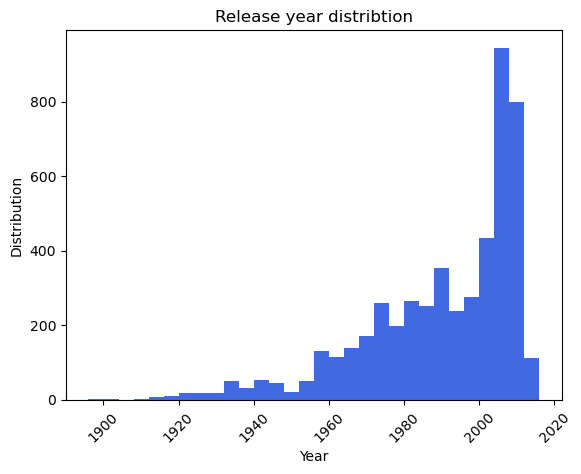

In [12]:
horror_df['Release_year'].hist(bins=30, xrot=45, grid=False, color='royalblue')
plt.title('Release year distribtion')
plt.xlabel('Year')
plt.ylabel('Distribution')

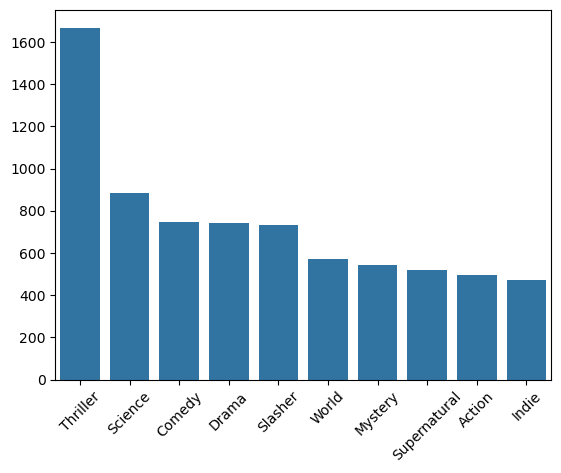

In [13]:
genre_counts = genres.sum().sort_values(ascending=False)
subgrenres = sns.barplot(genre_counts.head(10))
subgrenres.tick_params(axis='x', rotation=45)

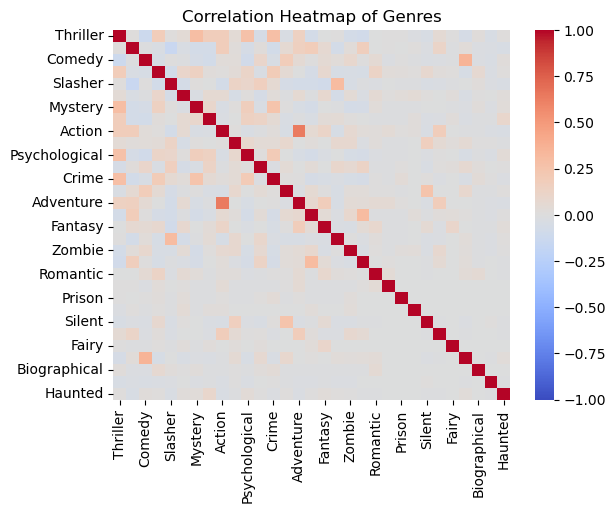

In [14]:
correlation_matrix = genres.corr()
#plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Genres")
plt.show()

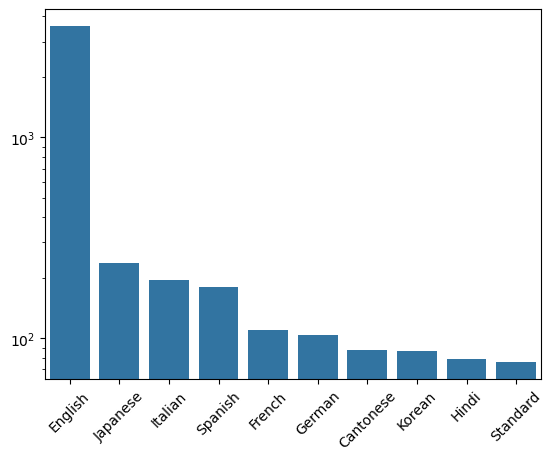

In [15]:
language_distribution = language_dummies.drop('Name', axis=1).sum().sort_values(ascending=False)
fig = sns.barplot(language_distribution.head(10))
fig.tick_params(axis='x', rotation=45)
fig.set_yscale('log')

In [16]:
horror_df.to_csv(r'/Users/valentine/Desktop/EPFL/Master/Ma1/ADA/Horror_df.csv', index=False)

In [17]:
tokens = pd.read_csv('/Users/valentine/Desktop/EPFL/Master/Ma1/ADA/tokens_df.csv')

In [18]:
tokens.head()

,word,count
0,one,4937
1,young,4526
2,man,3606
3,woman,3246
4,film,3018


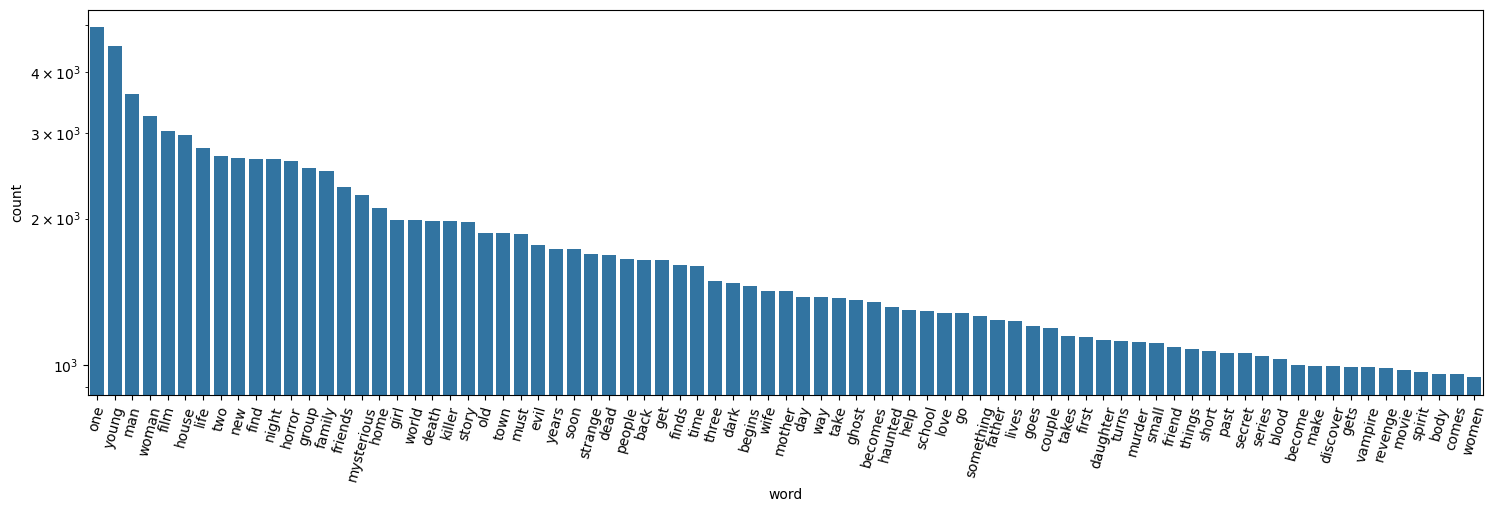

In [35]:
plt.figure(figsize=(18, 5))
fig = sns.barplot(tokens.head(80), x='word', y='count')
fig.tick_params(axis='x', rotation=75)
fig.set_yscale('log')